<a href="https://colab.research.google.com/github/Ubaldo-Yareli/M-todos-numericos/blob/main/Interpolaci%C3%B3n_de_Lagrange_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados ciertos puntos $x_0$, $x_1$ se halla el polinomio de interpolación de Lagrange se grado 1, es decir, lineal (en el ejemplo utilizado) pero se puede calcular el polinomio de interpolación de grado $n$, calculando el polinomio con $P(x)=f(x_0)L_{n,0}(x)+...+f(x_n)L_{n,n}(x)=\sum_{k=0}^{n}f(x_k)L_{n,k}(x)$
y encontrando $L_{n,k}$ con $L_{n,k}(x)=\frac{(x-x_0)...(x-x_{k-1})(x-x_{k+1})...(x-x_n)}{(x_k-x_0)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)}$

Se puede calcular el valor de $f(x)$ sustituyendo el valor en el polinomio encontrado previamente.


El polinomio de interpolación de Lagrange es:
6 - x


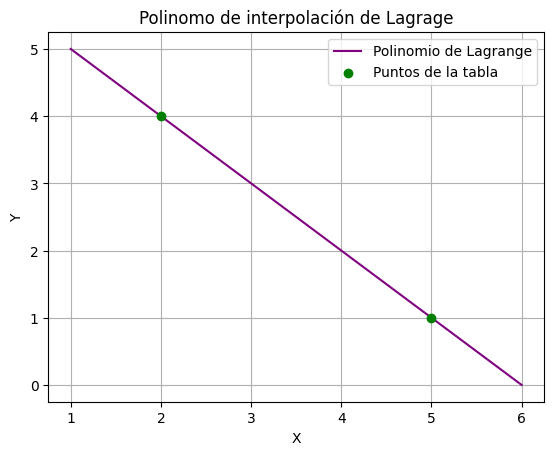

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Función para obtener el polinomio de interpolación de Lagrange
def interpolacion_de_lagrange(x_tabla, y_tabla):
    x=sp.symbols('x')
    n=len(x_tabla)
    polinomio=0

    for k in range(n):
        term=y_tabla[k]
        for i in range(n):
            if k!=i:
                term*=(x-x_tabla[i])/(x_tabla[k]-x_tabla[i]) #Fórmula del n-ésimo polinomio de interpolación de Lagrange
        polinomio +=term #La sumatoria de lo términos

    polinomio=sp.simplify(polinomio)
    return polinomio

def plot_lagrange(x_tabla, y_tabla, polinomio):
    poly_func=sp.lambdify(sp.symbols('x'), polinomio, 'numpy')
    x_valores=np.linspace(min(x_tabla)-1, max(x_tabla)+1, 500)#Valores que toma el eje x
    y_valores=poly_func(x_valores)

    #Gráfica
    plt.plot(x_valores, y_valores, label="Polinomio de Lagrange", color='purple')
    plt.scatter(x_tabla, y_tabla, label="Puntos de la tabla", zorder=5, color='green')
    plt.title("Polinomo de interpolación de Lagrage")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.legend()
    plt.show()

#Tabla de datos
x_tabla = [2, 5]
y_tabla= [4, 1]

polinomio=interpolacion_de_lagrange(x_tabla, y_tabla)

print("El polinomio de interpolación de Lagrange es:")
sp.pprint(polinomio) #Imprime el polinomio

plot_lagrange(x_tabla, y_tabla, polinomio) #Imprime la gráfica
